# **SYSTEMS HW 2**

#### **group 1**: Shanzeh Amirali, Alex Taylor, Nancy Kye, Bhavesh Mekala, Anika Banerjee, & Mia Bechara

*here is a link to a cute/funny cat website*: https://cat-bounce.com/

<u> what our project is about </u>

Working as a group, we were able to use an AI tool (ChatGPT in this case) to provide guidance and insight into building a simply leaky integrate and fire (LIF) model neuron using Python code. As seen below, the code gave us the output of membrane potential vs. time. The variables found in our code are defined inside the code itself. As a treat, we wanted to include a fun cat website to give you a break from starting at letters, dashes, and dots :)

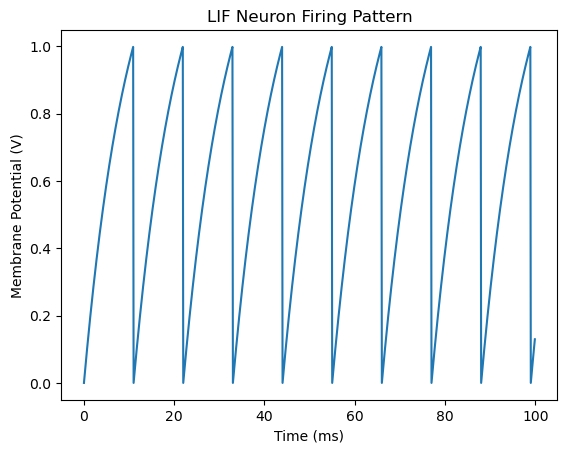

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def LIF_neuron(I, time, tau=10, V_threshold=1, V_reset=0, R=1, dt=0.1):
    """
    Simulates a Leaky Integrate-and-Fire neuron.

    Parameters:
    - I: Input current.
    - time: Total time for the simulation.
    - tau: Membrane time constant.
    - V_threshold: Threshold voltage for firing.
    - V_reset: Reset voltage after firing.
    - R: Membrane resistance.
    - dt: Time step for the simulation.

    Returns:
    - V: Membrane potential over time.
    - spikes: Spike times.
    """
    V = np.zeros(int(time/dt))
    spikes = []
    V_m = 0

    for t in range(1, len(V)):
        V_m += dt/tau * (-V_m + I*R)
        if V_m >= V_threshold:
            spikes.append(t*dt)
            V_m = V_reset
        V[t] = V_m

    return V, spikes

# Example usage
time = 100
I = 1.5  # change this value to see different firing patterns
V, spikes = LIF_neuron(I, time)
t = np.arange(0, time, 0.1)

plt.plot(t, V)
plt.title('LIF Neuron Firing Pattern')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (V)')
plt.show()

**4.) Based on what you know regarding the LIF model, what aspect of this model is most unlike a real biological neuron? What is missing?**

The LIF model does not take into account the spatial and temporal complexity of real neurons, as well as the synaptic plasticity/strength of synapses. Additionally, the model lacks the different ion channels (such as those that are voltage-gated) that are present in real biological neurons.


**5.) What was the most challenging aspect of this homework?**

The most challenging part was getting the code to show the individual spikes. We tried multiple different prompts and were having a hard time getting the scaling on the visualization correct, so that we could see spike activity. 

**6.) Estimate how long it took you to complete this homework**

Even with all of us collaborating together, the assignment took about 1 hour to complete. 

# **SYSTEMS HW 3**

#### **Group Members**: Shanzeh Amirali, Alex Taylor, Nancy Kye, Bhavesh Mekala, Anika Banerjee, & Mia Bechara

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


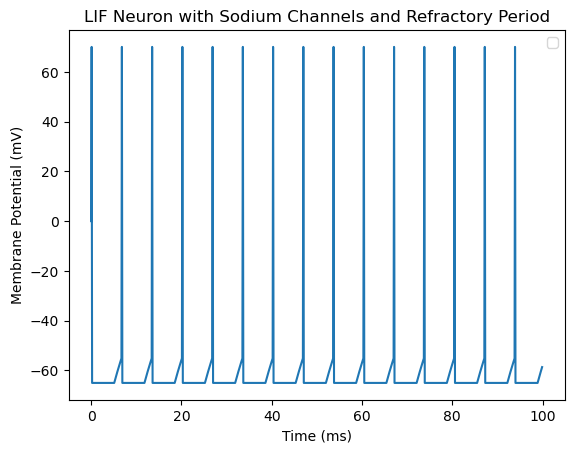

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def lif_neuron_with_sodium(I, time, tau=10, V_threshold=-55, V_reset=-65, V_peak=70,
                           R=1, dt=0.1, g_Na=0.1, E_Na=50, refractory_period=5):
    """
    Simulates a Leaky Integrate-and-Fire neuron with voltage-gated sodium channels and refractory period.

    Parameters:
    - I: Input current.
    - time: Total time for the simulation.
    - tau: Membrane time constant.
    - V_threshold: Threshold voltage for firing.
    - V_reset: Reset voltage after firing.
    - V_peak: Peak voltage reached during action potential.
    - R: Membrane resistance.
    - dt: Time step for the simulation.
    - g_Na: Sodium conductance.
    - E_Na: Sodium equilibrium potential.
    - refractory_period: Duration of the refractory period after a spike.

    Returns:
    - V: Membrane potential over time.
    - spikes: Spike times.
    """
    V = np.zeros(int(time/dt))
    spikes = []
    in_refractory = 0

    for t in range(1, len(V)):
        if in_refractory > 0:
            # In refractory period, reset and skip integration
            V[t] = V_reset
            in_refractory -= 1
        else:
            # Simulate the leaky integration
            V[t] = V[t-1] + dt/tau * (-V[t-1] + I*R)

            # Check for spike
            if V[t] >= V_threshold:
                spikes.append(t*dt)
                V[t] = V_peak  # Set to peak value
                in_refractory = int(refractory_period / dt)  # Enter refractory period

    return V, spikes

# Example usage
time = 100
I = 1.5  # Input current
V, spikes = lif_neuron_with_sodium(I, time)
t = np.arange(0, time, 0.1)

plt.plot(t, V)
plt.title('LIF Neuron with Sodium Channels and Refractory Period')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
#plt.scatter(spikes, int(V_peak)*len(spikes), color='red', marker='o', label='Spikes')#
plt.legend()
plt.show()

#### questions

**1.) Why does the Leaky Integrate and Fire model needs to have voltage-gated sodium channels added to it in order to be a better model of a neuron and what doing this should theoretically accomplish & how it will change your visualizations?**

Adding voltage-gated sodium channels to the Leaky Integrate and Fire model would make the model more representative of a biological neuron, as voltage-gated sodium ions are necessary for producing action potentials. These ion channels are responsible for allowing sodium ions to come into the neuron when activated. Depolarization of the neuron is required for an action potential to occur. With the incorporation of these channels, we should be able to see slight depolarization before the spike initiations within the model. Therefore, it is important to include voltage-gated sodium channels into the LIF model to yield a more accurate visualization.

**2.)  Below the above paragraph copy your original LIF model and see if you can update it to include voltage-gated sodium channels and produce a new visualization**

The code for the original LIF model is seen at the top of this workbook and the new and altered code (with the visualization) is seen above the first question. 

**3.) What changes had to be made and why or to discuss what went wrong/why you were unable to do this task if you struggled**

To change our code to produce a graph showing the voltage-gated ligand channels, we had to input parameters for the socidum conductance as well as the equilibrium potential. This new graph shows an initail depolarization of the membrane potential before a spike is fired (like a voltage-gated channel). Additionally, from last week’s homework, we were able to change our y-axis (membrane potential) from V to mV with accurate values (-60mV to 70mV) to help simulate a biological neurons. When were were trying to plot our data, we ran into an issue with errors produced from the code (saying something how a named variable wasn’t defined even though it was), however, the graph with correctly labeled axes was still obtained. 

**4.Comment on your ability to work collaboratively using Git-Hub. For instance, did you encounter any problems? How did you overcome them? Or are you still unable to make it work?**

We were able to get access to the group GitHub respository that was created, however, the main issue we have is trying to edit the JupyterLab and coding together at once. We have only found Google Docs to be helpful in collaborating all together on the same document. Additionally, when someone who wasn’t the own of the repository tried to add something, it wasn’t working.

**5.) Looking ahead, based on Lectures 5-6, give a prediction of how complicated you think the coding will be in order to model a simple feedforward neural network trained using gradient descent and backpropagation. Why does it have to be so much more complicated than the LIF model and/or what does this increased complexity tell us about the information contained within it?**

A simple feedforward neural network consists of hidden layers of interconnected neurons, which makes it much more complex to code in comparison to an LIF model. Additionally, the neural network model has to be more complex because it can extract and identify its own features. Moreoever, the graph we created is simply showing an input and the subsequent output data. However, this model not show an optimization or training of the input/output nodes through the use of mathematical tools. This increased information that has to do with ML, ANN, and DNN shows the complexity and the full function of biological neural systems. The graph we created only shows the input and output of a single and leaky neuron. 
